# Benchmarking sorting algorithms in Python
INF221 small project, NMBU, Spring 2024

### Importing packages

In [1]:
import numpy as np
import timeit
import copy
import pandas as pd
import matplotlib.pyplot as plt

### Insertion Sort 
by Mohit Kumra\
https://www.geeksforgeeks.org/insertion-sort/


In [2]:
# Function to do insertion sort

def insertionSort(arr):
 
    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):
 
        key = arr[i]
 
        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        j = i-1
        while j >= 0 and key < arr[j] :
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key
  
# This code is contributed by Mohit Kumra

### Merge Sort
by Mayank Khanna\
https://www.geeksforgeeks.org/merge-sort/

In [3]:
# Python program for implementation of MergeSort

def mergeSort(arr):
    if len(arr) > 1:
 
         # Finding the mid of the array
        mid = len(arr)//2
 
        # Dividing the array elements
        L = arr[:mid]
 
        # Into 2 halves
        R = arr[mid:]
 
        # Sorting the first half
        mergeSort(L)
 
        # Sorting the second half
        mergeSort(R)
 
        i = j = k = 0
 
        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
 
        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
 
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
 

# This code is contributed by Mayank Khanna

### Quick Sort
by Adnan Aliakbar\
https://www.geeksforgeeks.org/quick-sort/

In [4]:
# #https://www.educative.io/answers/how-to-implement-quicksort-in-python

# def quickSort(arr):

#     elements = len(arr)
    
#     #Base case
#     if elements < 2:
#         return arr
    
#     current_position = 0 #Position of the partitioning element

#     for i in range(1, elements): #Partitioning loop
#          if arr[i] <= arr[0]:
#               current_position += 1
#               temp = arr[i]
#               arr[i] = arr[current_position]
#               arr[current_position] = temp

#     temp = arr[0]
#     arr[0] = arr[current_position] 
#     arr[current_position] = temp #Brings pivot to it's appropriate position
    
#     left = quickSort(arr[0:current_position]) #Sorts the elements to the left of pivot
#     right = quickSort(arr[current_position+1:elements]) #sorts the elements to the right of pivot

#     arr = left + [arr[current_position]] + right #Merging everything together
    
#     return arr


# https://www.geeksforgeeks.org/quick-sort/
# Python3 implementation of quickSort
 
# Wrapper over quickSort
def quickSort(arr):
    quicksort(arr, 0, len(arr) - 1)

  
# Function to perform quicksort
def quicksort(array, low, high):
    if low < high:
 
        # Find pivot element such that
        # element smaller than pivot are on the left
        # element greater than pivot are on the right
        pi = partition(array, low, high)
 
        # Recursive call on the left of pivot
        quicksort(array, low, pi - 1)
 
        # Recursive call on the right of pivot
        quicksort(array, pi + 1, high)

# Function to find the partition position
def partition(array, low, high):
 
    # Choose the rightmost element as pivot
    pivot = array[high]
 
    # Pointer for greater element
    i = low - 1
 
    # Traverse through all elements
    # compare each element with pivot
    for j in range(low, high):
        if array[j] <= pivot:
 
            # If element smaller than pivot is found
            # swap it with the greater element pointed by i
            i = i + 1
 
            # Swapping element at i with element at j
            (array[i], array[j]) = (array[j], array[i])
 
    # Swap the pivot element with
    # the greater element specified by i
    (array[i + 1], array[high]) = (array[high], array[i + 1])
 
    # Return the position from where partition is done
    return i + 1 
 
# This code is contributed by Adnan Aliakbar

### Generate Data

In [5]:
def generate_data(size, algorithm, case):
    rng = np.random.default_rng(12235)
    
    # Average case
    if case == 'average':
        return rng.uniform(size=size)  # Random elements for the average case
    
    # Best case
    elif case == 'best':
        if algorithm == 'InsertionSort':
            return np.arange(size)  # Sorted in ascending order for best case
        elif algorithm == 'MergeSort':
            return rng.uniform(size=size)  # MergeSort's performance is the same for all cases
        elif algorithm == 'QuickSort':
            return np.arange(size, 0, -1)  # Sorted in reverse order for best case
       
    # Worst case    
    elif case == 'worst':
        if algorithm == 'InsertionSort':
            return np.arange(size, 0, -1)  # Sorted in descending for worst case
        elif algorithm == 'QuickSort':
            return np.arange(size) # Sorted in ascending order for worst case
        elif algorithm == 'MergeSort':
            return rng.uniform(size=size)  # MergeSort's performance is the same for all cases

### Benchmarking

In [6]:
def benchmarking(algorithms, sizes, repetitions, case):
    results = []

    for name in algorithms:
        func = algorithms[name]
        for size in sizes:
            test_data = generate_data(size, name, case)
            clock = timeit.Timer(stmt='sort_func(copy(data))',
                                 globals={'sort_func': func, 
                                          'data': test_data, 
                                          'copy': copy.copy})
            nE, n_ar = clock.autorange()
            times = clock.repeat(repeat=repetitions, number=nE)
            
            for time in times:
                results.append({
                    'Algorithm': name,
                    'Size': size,
                    'Case': case,
                    'Time': time / nE,
                    'Executions': nE
                })

    df = pd.DataFrame(results)
    return df

In [7]:
# Example usage
algorithms = {
    'InsertionSort': insertionSort,
    'MergeSort': mergeSort,
    'QuickSort': quickSort
}

sizes = [100 * pow(2, i) for i in range(5)] 
repetitions = 7


cases = ['best', 'worst', 'average']

for case in cases:
    df = benchmarking(algorithms, sizes, repetitions, case)

    print(df)
    # Save to pickle
    df.to_pickle(f"benchmark_results_{case}_case.pkl")



         Algorithm  Size  Case      Time  Executions
0    InsertionSort   100  best  0.000022       10000
1    InsertionSort   100  best  0.000024       10000
2    InsertionSort   100  best  0.000020       10000
3    InsertionSort   100  best  0.000019       10000
4    InsertionSort   100  best  0.000020       10000
..             ...   ...   ...       ...         ...
100      QuickSort  1600  best  0.279341           1
101      QuickSort  1600  best  0.304136           1
102      QuickSort  1600  best  0.305857           1
103      QuickSort  1600  best  0.307146           1
104      QuickSort  1600  best  0.286896           1

[105 rows x 5 columns]
         Algorithm  Size   Case      Time  Executions
0    InsertionSort   100  worst  0.000934         500
1    InsertionSort   100  worst  0.000913         500
2    InsertionSort   100  worst  0.001034         500
3    InsertionSort   100  worst  0.001017         500
4    InsertionSort   100  worst  0.000993         500
..             .

### Plotting Benchmarking Data

In [8]:
# Load the DataFrame
def mean_sorts(df):
    # Group by 'Algorithm', 'Size', and 'Case' and calculate the mean of 'Time'
    means = df.groupby(['Algorithm', 'Size', 'Case']).mean()['Time'].round(5)
    # Reset index to convert indices into columns
    means = means.reset_index()
    # Pivot the DataFrame to make 'Size' the index, columns to be the algorithms, and values to be 'Time', separated by 'Case'
    means = means.pivot_table(index='Size', columns=['Algorithm', 'Case'], values='Time')
    return means

def plot_figure(df_means):
    plt.rcParams["figure.figsize"] = (16, 8)
    # Ensure that the means are sorted by 'Size' (the index)
    df_means = df_means.sort_index()
    # Plotting the benchamrking data
    ax = df_means.plot(kind='line', lw=2, marker='o', markersize=5)
    ax.set_ylabel("Running Time [ms]")
    ax.set_xlabel("Input Size")
    plt.legend(title="Algorithm and Case", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Plotting Theoretical Boundaries

In [9]:
def plot_theoretical_complexities(sizes, case):
    plt.figure(figsize=(16, 8))
    
    if case == 'best':
        plt.plot(sizes, sizes, label='n, Insertion Sort', linestyle='--', color='gray')
        plt.plot(sizes, sizes * np.log(sizes), label='n log n, Merge and Quick Sort', linestyle='--', color='red')
    elif case == 'average':
        plt.plot(sizes, sizes * np.log(sizes), label='n log n, Merge and Quick Sort', linestyle='--', color='red')
        plt.plot(sizes, np.square(sizes), label='n^2, Insertion Sort', linestyle='--', color='blue')
    elif case == 'worst':
        plt.plot(sizes, np.square(sizes), label='n^2, Insertion and Quick Sort', linestyle='--', color='blue')
        plt.plot(sizes, sizes * np.log(sizes), label='n log n, Merge Sort', linestyle='--', color='red')

    plt.xlabel('Input Size')
    plt.ylabel('Running Time [ms]')
    plt.title(f'Theoretical Complexity, {case} Case')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Worst Case, Benchmarking

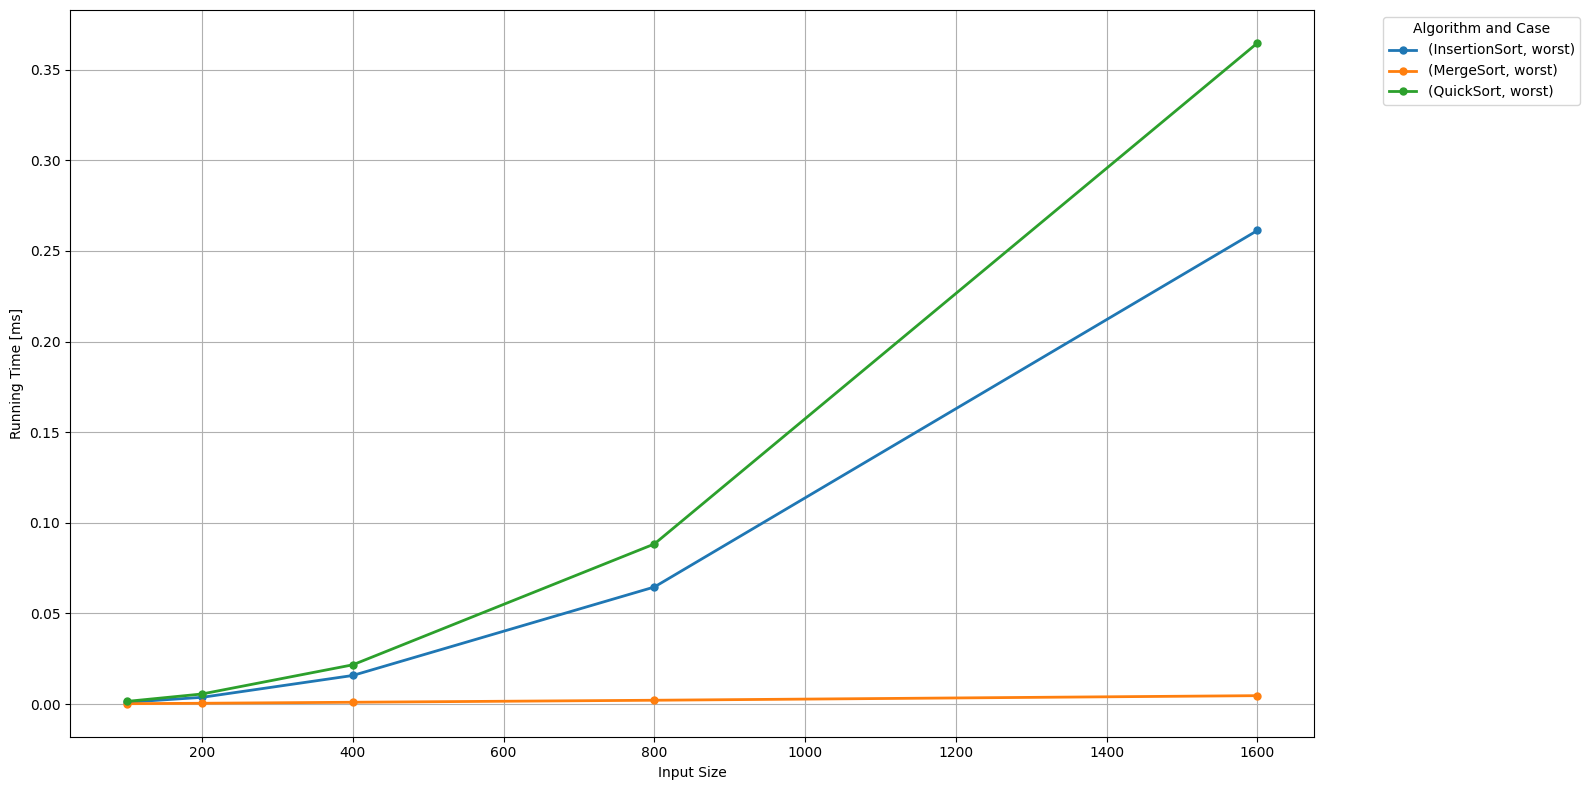

In [10]:
df_worst = pd.read_pickle("benchmark_results_worst_case.pkl")
df_means_worst = mean_sorts(df_worst)
plot_figure(df_means_worst)

### Worst Case, Theoretical

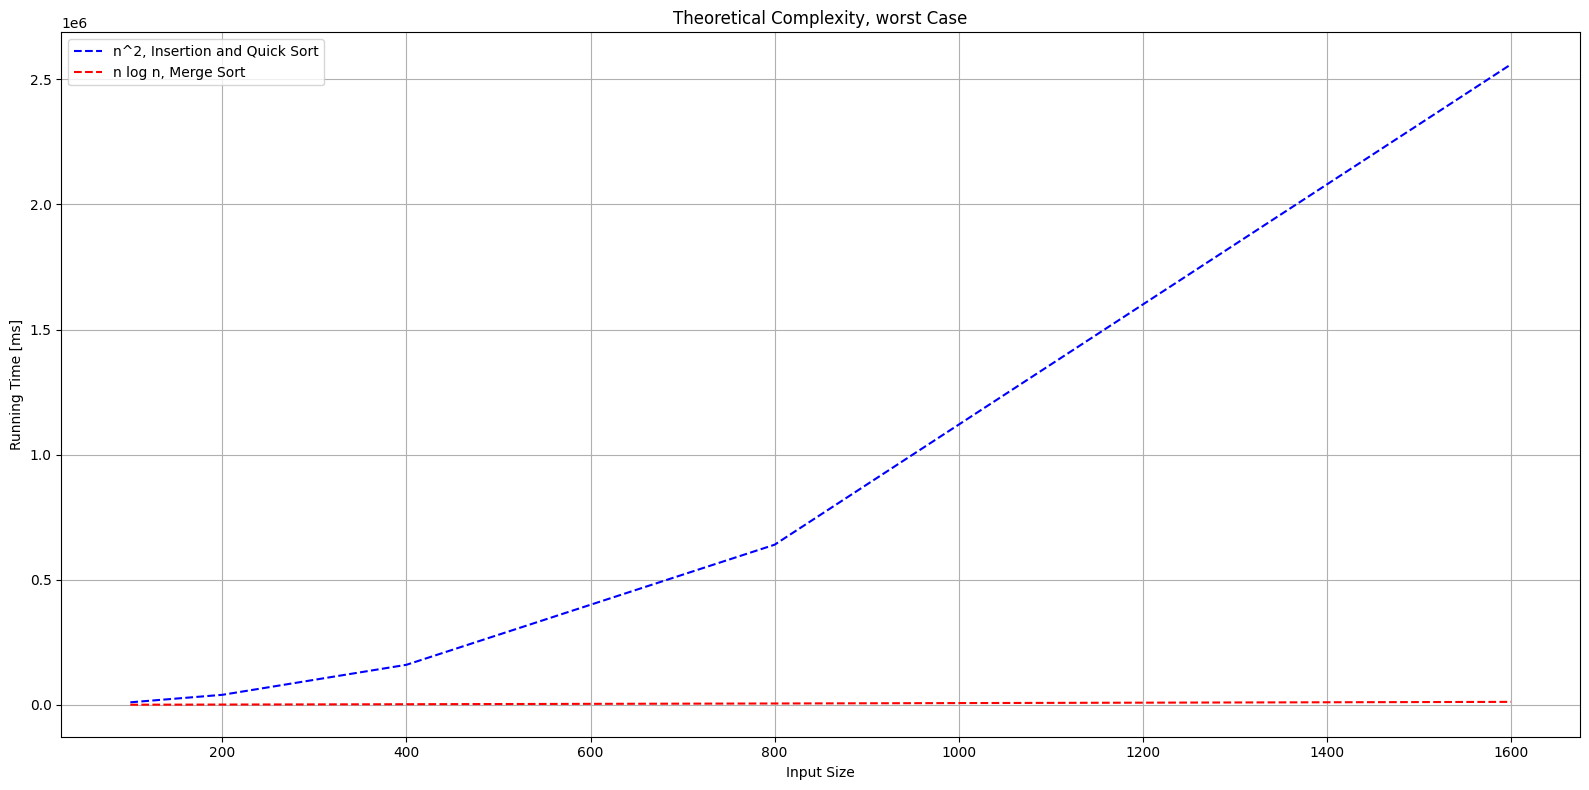

In [11]:
plot_theoretical_complexities(sizes, 'worst')

### Average Case, Benchmarking

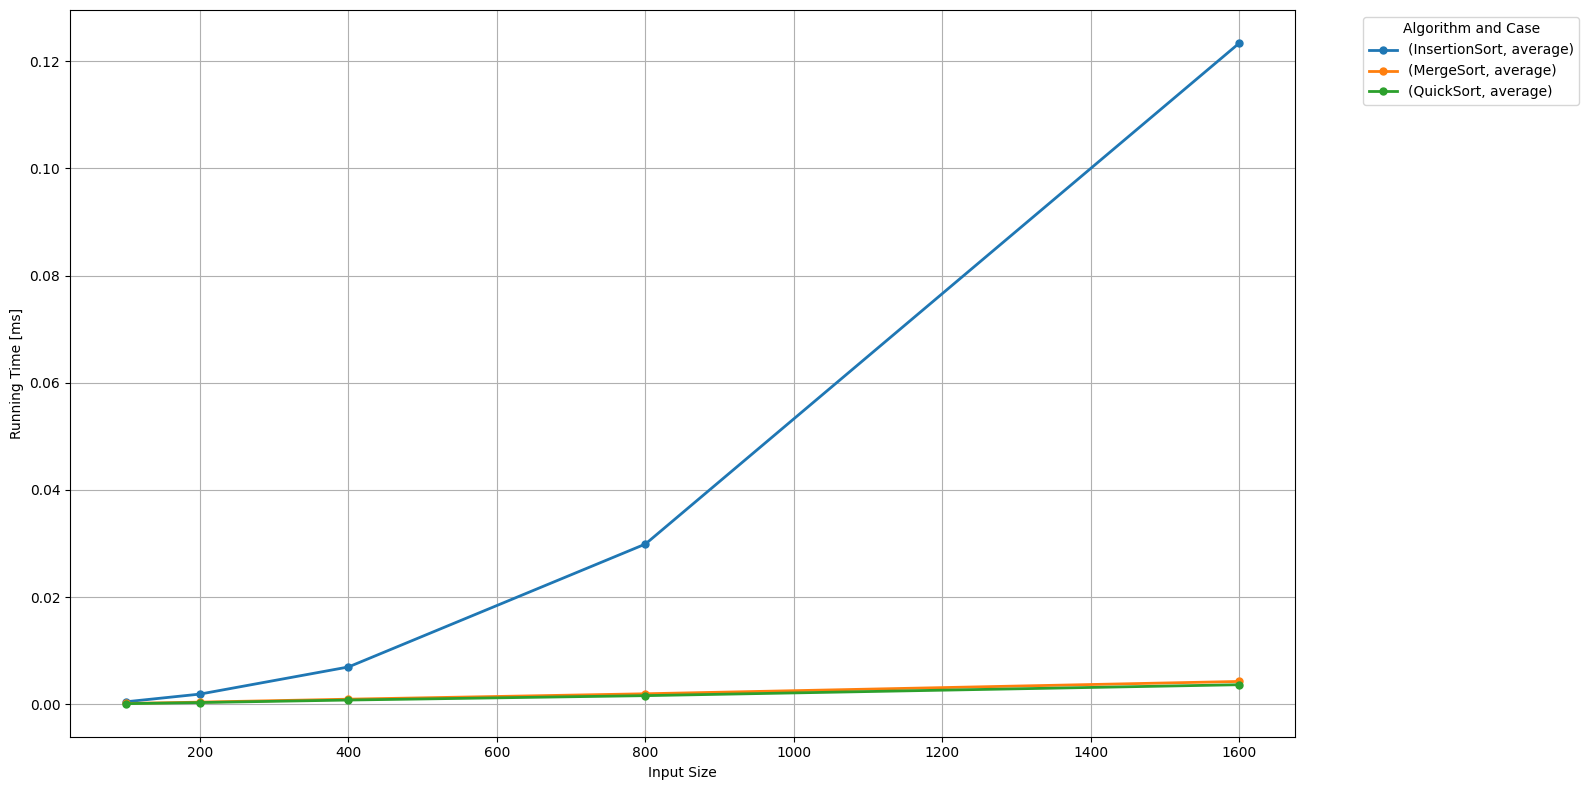

In [12]:
df_average = pd.read_pickle("benchmark_results_average_case.pkl")
df_means_average = mean_sorts(df_average)
plot_figure(df_means_average)


### Average Case, Theoretical

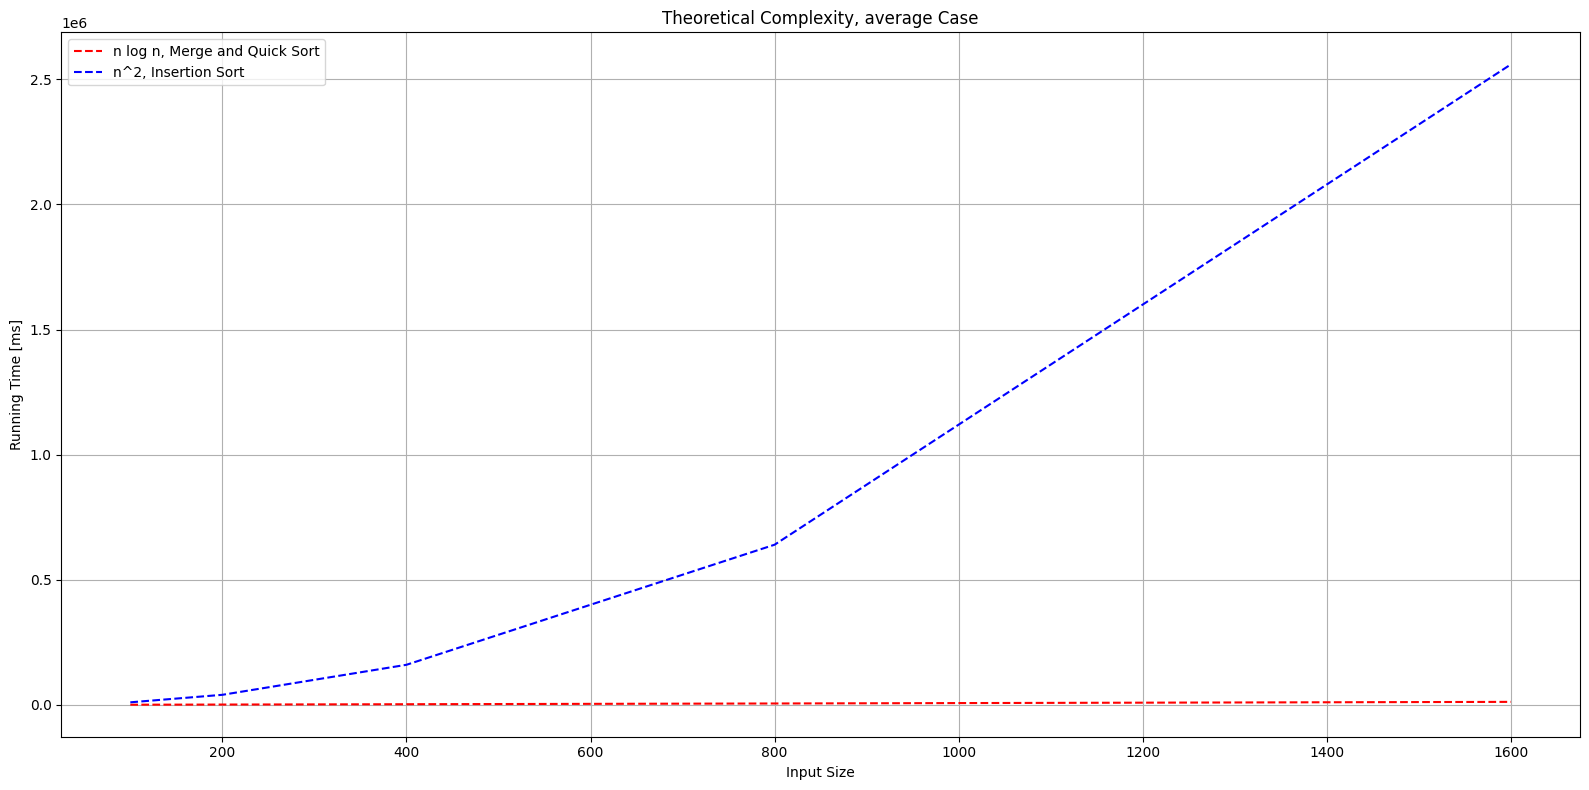

In [13]:
plot_theoretical_complexities(sizes, 'average')

### Best Case, Benchmarking

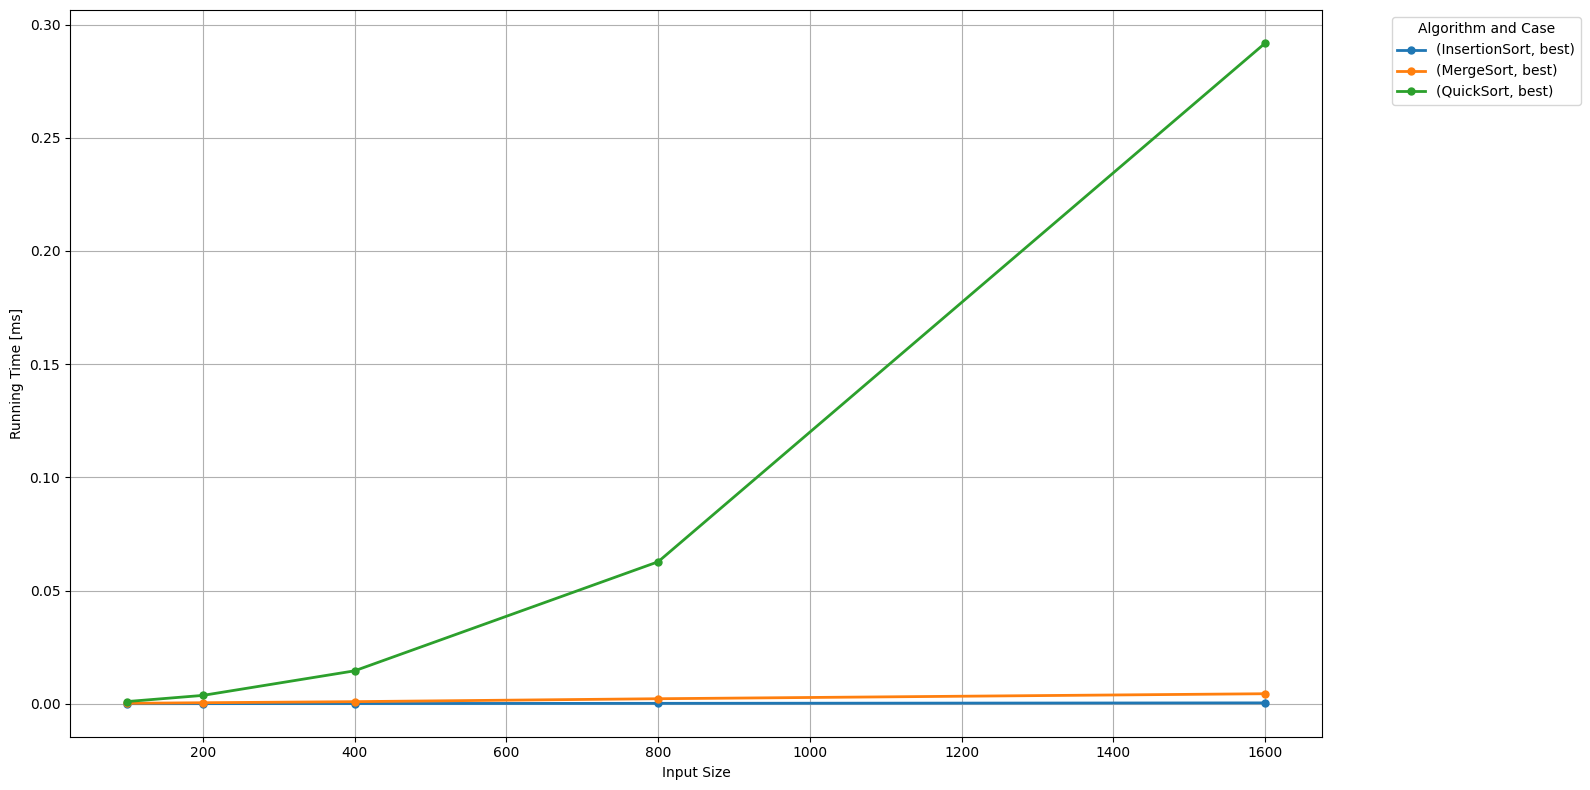

In [14]:
df_best = pd.read_pickle("benchmark_results_best_case.pkl")
df_means_best = mean_sorts(df_best)
plot_figure(df_means_best)

### Best Case, Theoretical

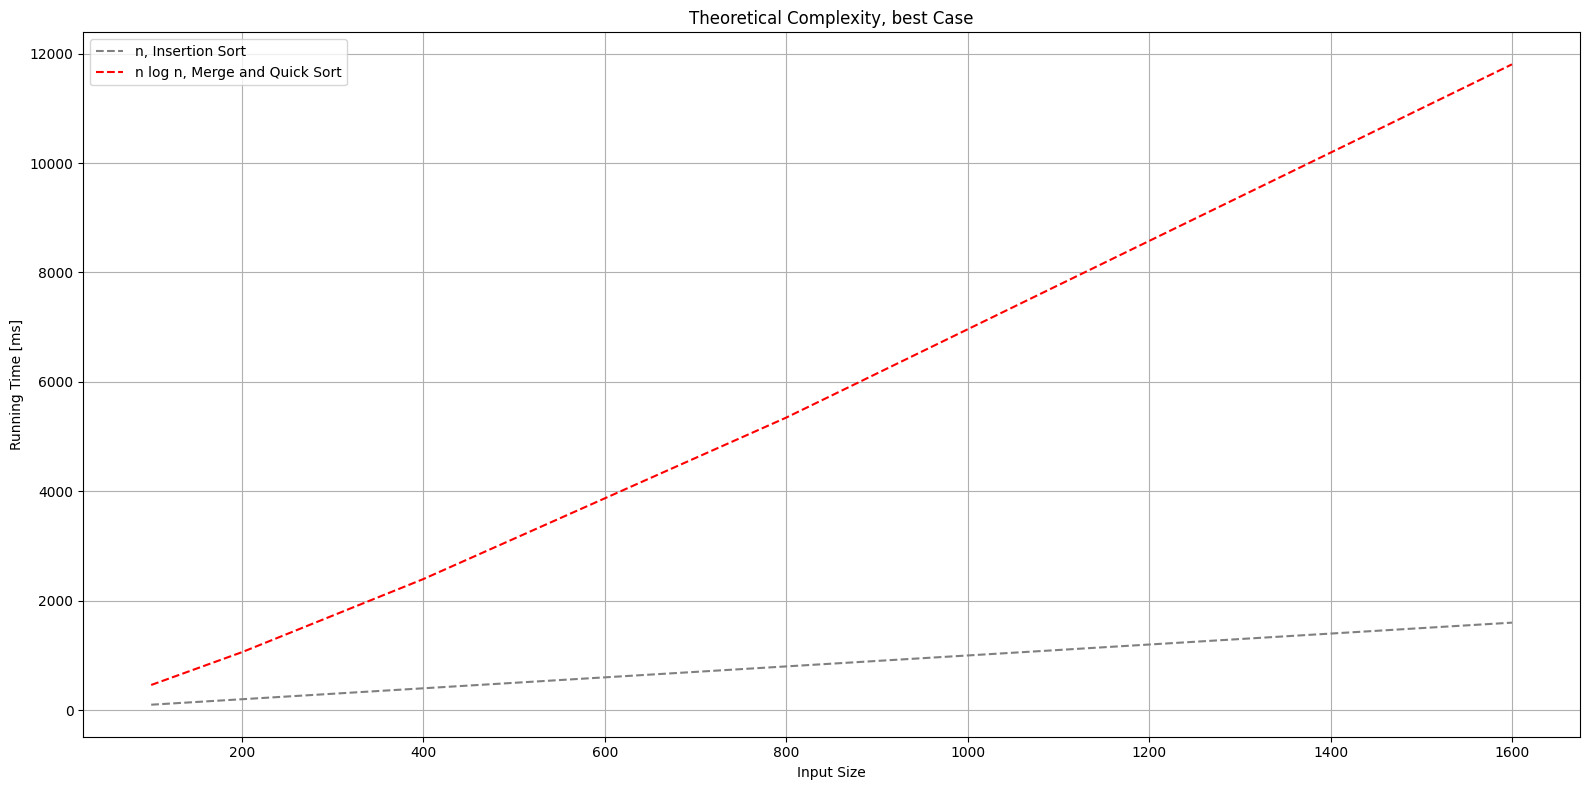

In [15]:
plot_theoretical_complexities(sizes, 'best')